# Setup

In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#import cv2 as cv

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
feature_data_folder = './feature_data/'

In [22]:
#load all features & labels
#hog features
train_hog = np.load(feature_data_folder + 'hog/train_hog.npy')
#test_hog = np.load(feature_data_folder + 'hog/test_hog.npy')
val_hog = np.load(feature_data_folder + 'hog/val_hog.npy')

#resnet feature maps
train_resnet = np.load(feature_data_folder + 'resnet18/train-fmaps.npy')
#test_resnet = np.load(feature_data_folder + 'resnet18/test-fmaps.npy')
val_resnet = np.load(feature_data_folder + 'resnet18/val-fmaps.npy')

#sift features
train_sift = np.load(feature_data_folder + 'sift/train_sift.npy')
#test_sift = np.load(feature_data_folder + 'sift/test_sift.npy')
val_sift = np.load(feature_data_folder + 'sift/val_sift.npy')

#load labels
train_labels = np.load(feature_data_folder + 'resnet18/train-labels.npy')
test_labels = np.load(feature_data_folder + 'resnet18/test-labels.npy')
val_labels = np.load(feature_data_folder + 'resnet18/val-labels.npy')

In [99]:
print(train_hog.shape)
print(train_resnet.shape)
print(train_sift.shape)
print(train_labels.shape)

(8960, 1000)
(8960, 512)
(8960, 1500)
(8960,)


In [7]:
resnet_scaler = StandardScaler().fit(train_resnet)
hog_scaler = StandardScaler().fit(train_hog)
sift_scaler = StandardScaler().fit(train_sift)

train_resnet = resnet_scaler.transform(train_resnet)
train_hog = hog_scaler.transform(train_hog)
train_sift = sift_scaler.transform(train_sift)

val_resnet = resnet_scaler.transform(val_resnet)
val_hog = hog_scaler.transform(val_hog)
val_sift = sift_scaler.transform(val_sift)

In [33]:
#concat all features into 1d vector
train_features = np.concatenate((train_hog, train_resnet, train_sift), axis = 1)
#test_features = np.concatenate((test_hog, test_resnet, test_sift), axis = 1)
val_features = np.concatenate((val_hog, val_resnet, val_sift), axis = 1)

In [114]:
#2 feature testing
train_features_2 = np.concatenate((train_resnet, train_sift), axis = 1)
#test_features_2 = np.concatenate((test_resnet, test_sift), axis = 1)
val_features_2 = np.concatenate((val_resnet, val_sift), axis = 1)

# Baseline LR

In [1]:
clf = LogisticRegression(max_iter = 1000).fit(train_features, train_labels)

NameError: name 'LogisticRegression' is not defined

In [ ]:
clf.score(train_features, train_labels)

In [ ]:
clf.score(val_features, val_labels)

In [56]:
preds = clf.predict(train_features)
corr = preds == train_labels

In [57]:
df = pd.DataFrame({'correct': corr, 'label': train_labels})

In [ ]:
ax = sns.countplot(df, x='correct', hue='label')
ax.set_title('Correct Predictions by Label')
ax.set_xlabel('Correct')
ax.set_ylabel('Count')

# SVM

In [8]:
clf = HistGradientBoostingClassifier(
    max_iter=25,
    learning_rate=0.1,
    max_depth=8,
    class_weight='balanced').fit(train_hog, train_labels)

In [58]:
clf = svm.SVC(class_weight = 'balanced')

In [56]:
def validation_score(estimator, X, y):
    y_pred = estimator.predict(val_features_pca)
    return accuracy_score(val_labels, y_pred)

In [59]:
#param_grid={'C': [0.1,1,10,100] } 
param_grid={'C': [10,12.5,15] } 
clf = GridSearchCV(clf, param_grid, scoring=validation_score).fit(train_features_pca, train_labels)

In [60]:
clf.best_estimator_

SVC(C=10, class_weight='balanced')

In [66]:
train_features_pca.shape

(8960, 1250)

In [61]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [10]:
clf.score(train_hog, train_labels)

0.9280133928571429

In [11]:
clf.score(val_hog, val_labels)

0.5687203791469194

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
cm_train = confusion_matrix(train_labels, clf.predict(train_hog))
cm_val = confusion_matrix(val_labels, clf.predict(val_hog))

[Text(0, 0, '89'),
 Text(0, 0, '66'),
 Text(0, 0, '49'),
 Text(0, 0, '16'),
 Text(0, 0, '7'),
 Text(0, 0, '42'),
 Text(0, 0, '42')]

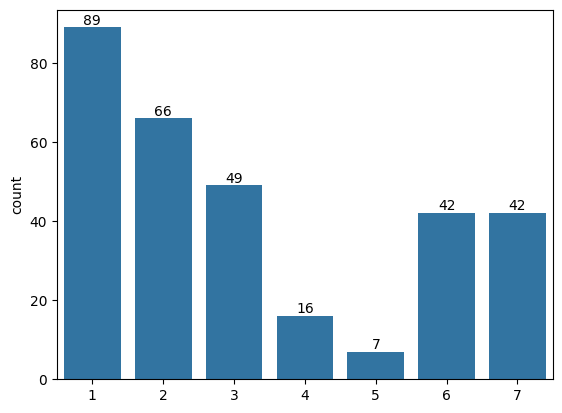

In [23]:
ax = sns.countplot(x=test_labels)
ax.bar_label(ax.containers[0])

In [27]:
tst_dist = np.array([89, 66, 49, 16, 7, 42, 42])
train_dist = np.array([3598, 616, 924, 1561, 343, 1281, 637])
val_dist = np.array([1337, 84, 602, 77, 126, 511, 217])

In [31]:
tots = tst_dist * 7 + train_dist + val_dist

In [33]:
(tst_dist * 7) / tots

array([0.11209068, 0.39759036, 0.1835206 , 0.064     , 0.09459459,
       0.1409396 , 0.25609756])

In [34]:
train_dist / tots

array([0.64735516, 0.53012048, 0.49438202, 0.892     , 0.66216216,
       0.61409396, 0.55487805])

In [35]:
val_dist / tots

array([0.24055416, 0.07228916, 0.32209738, 0.044     , 0.24324324,
       0.24496644, 0.18902439])

[Text(0, 0, '3598'),
 Text(0, 0, '616'),
 Text(0, 0, '924'),
 Text(0, 0, '1561'),
 Text(0, 0, '343'),
 Text(0, 0, '1281'),
 Text(0, 0, '637')]

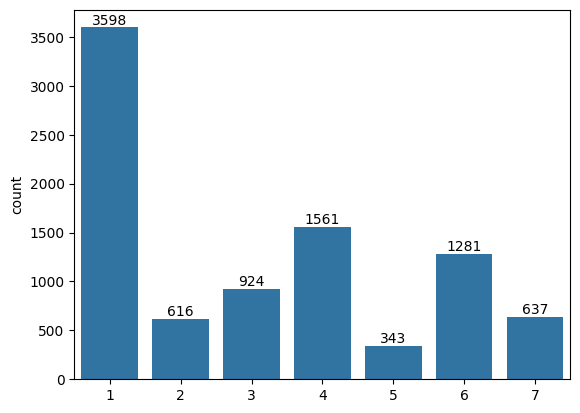

In [19]:
ax = sns.countplot(x=train_labels)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1337'),
 Text(0, 0, '84'),
 Text(0, 0, '602'),
 Text(0, 0, '77'),
 Text(0, 0, '126'),
 Text(0, 0, '511'),
 Text(0, 0, '217')]

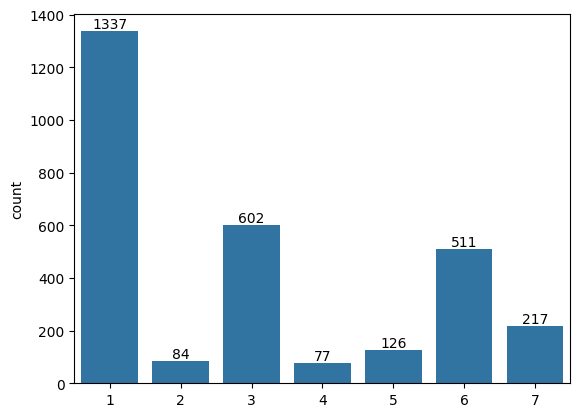

In [20]:
ax = sns.countplot(x=val_labels)
ax.bar_label(ax.containers[0])

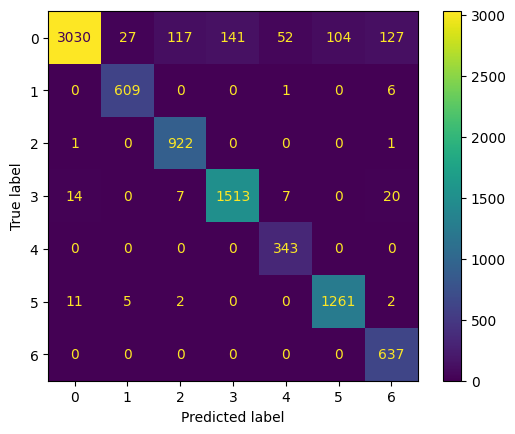

In [15]:
ConfusionMatrixDisplay(cm_train).plot()

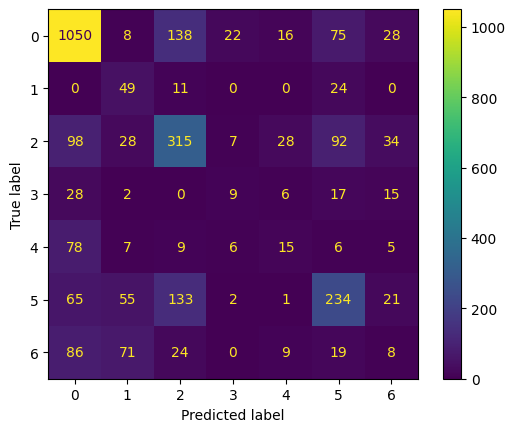

In [16]:
ConfusionMatrixDisplay(cm_val).plot()

In [22]:
majority_label = np.ones(val_labels.shape)
accuracy_score(val_labels, majority_label)

0.45260663507109006

Text(0, 0.5, 'Count')

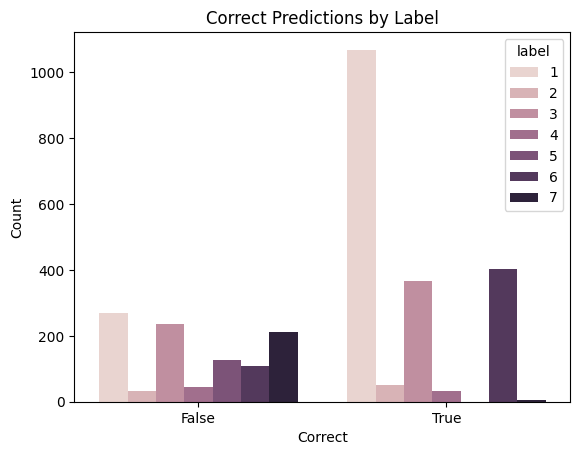

In [98]:
preds = clf.predict(val_features)
corr = preds == val_labels
df = pd.DataFrame({'correct': corr, 'label': val_labels})
ax = sns.countplot(df, x='correct', hue='label')
ax.set_title('Correct Predictions by Label')
ax.set_xlabel('Correct')
ax.set_ylabel('Count')

## Class Rebalancing

In [ ]:
unique, counts = np.unique(train_labels, return_counts = True)
print(unique, counts) #min count is 343
min_label = min(counts)
print(min_label)

In [101]:
balanced_ids = []
for label in np.unique(train_labels):
    balanced_ids.append(np.where(train_labels == label)[0][:min_label])
balanced_ids = np.array(balanced_ids).flatten()
balanced_train_labels = train_labels[balanced_ids]
balanced_train_features = train_features[balanced_ids]

In [ ]:
print(balanced_train_labels.shape)
print(balanced_train_features.shape)

In [104]:
svc_clf = svm.SVC(class_weight = 'balanced').fit(balanced_train_features, balanced_train_labels)

In [ ]:
svc_clf.score(balanced_train_features, balanced_train_labels)

In [ ]:
svc_clf.score(val_features, val_labels)

In [ ]:
preds = svc_clf.predict(val_features)
corr = preds == val_labels
df = pd.DataFrame({'correct': corr, 'label': val_labels})
ax = sns.countplot(df, x='correct', hue='label')
ax.set_title('Correct Predictions by Label')
ax.set_xlabel('Correct')
ax.set_ylabel('Count')

In [ ]:
#confusion matrix
cm = confusion_matrix(val_labels, preds, labels = svc_clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = svc_clf.classes_)
disp.plot()
plt.show()

# Linear SVM

In [85]:
linear_svc = svm.LinearSVC().fit(train_features, train_labels)

In [ ]:
linear_svc.score(train_features, train_labels)

In [ ]:
linear_svc.score(val_features, val_labels)

# PCA

In [34]:
pca = PCA()
pca.fit(train_features)

PCA()

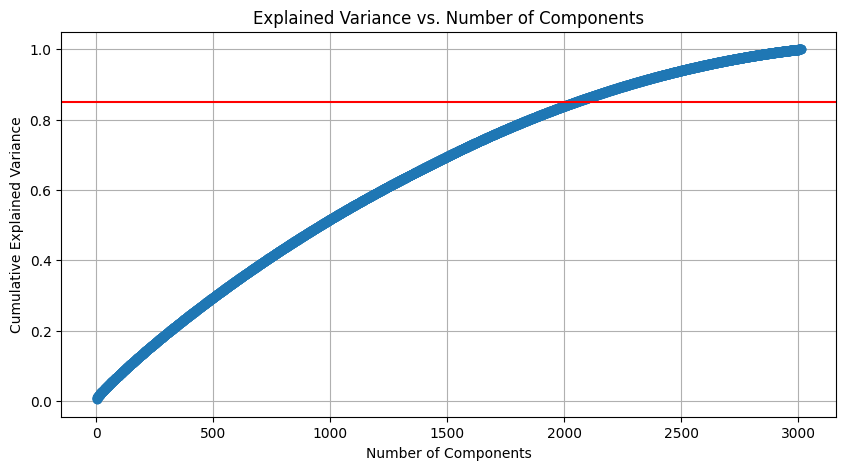

In [35]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
# draw a line at 90% of explained variance
plt.axhline(y=0.85, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [45]:
pca = PCA(n_components=1250)
pca.fit(train_features)

PCA(n_components=1250)

In [46]:
train_features_pca = pca.transform(train_features)
val_features_pca = pca.transform(val_features)
#test_features_pca = pca.transform(test_features)

In [136]:
svc_clf = svm.SVC(class_weight = 'balanced').fit(train_features_pca, train_labels)

In [ ]:
svc_clf.score(train_features_pca, train_labels)

In [ ]:
svc_clf.score(val_features_pca, val_labels)